# Reconhecimento de imagens

In [31]:
from sklearn import datasets
digits = datasets.load_digits()

In [32]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [33]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


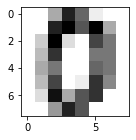

In [34]:
import matplotlib.pyplot as plt 
%matplotlib inline

plt.figure(figsize=(2,2))
plt.imshow(digits.images[0],cmap=plt.cm.gray_r)

## Aplicação do SVM (Support Vector Machine)

In [35]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test, = train_test_split(x,y, test_size=0.30, random_state=5)

In [36]:
from sklearn import svm
from sklearn import metrics
classifier = svm.SVC()
classifier.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Leitura da imagem de um dígito

In [37]:
import numpy as np
import matplotlib.image as mpimg

img = mpimg.imread('number2.png')

def rgb2gray(rgb):
    img_array = np.dot(rgb[...,:3],[0.299,0.587,0.114])
    img_array = (16-(img_array*16)).astype(int)
    img_array = img_array.flatten()
    return img_array
    
previsao = classifier.predict([rgb2gray(img)])
print(previsao)

[8]


### Teste com regressão logística

In [38]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
previsao_logreg=logreg.predict([rgb2gray(img)])
print(previsao_logreg)

[8]


C:\Users\henri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
